## Shap Values notebook 

In this notebook the SHAP values for the best model and data frame are computed

In [37]:
from keras.models import load_model
import numpy as np
import pandas as pd

best_model = load_model('model_path.keras')

X_train = pd.read_csv('Inputs/Dataset_5/X_train.csv')
y_train = pd.read_csv('Inputs/Dataset_5/X_val.csv')
X_test_subset = pd.read_csv("Inputs/Dataset_5/X_test.csv")

# Define features for summary plot
features = [
       # Dataset 1:
       'payment_terms', 'customer_id_enc', 'log_amount', #  Feature            
       'day_of_week_0', # day_of_due_date 
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6',
       # Dataset 2:
       'country_enc',
       # Dataset 3: payment features
       'ratio_outstanding', "near_payment_term_ratio", "overdue_ratio", "rolling_avg_dso", 
       'paid_invoices',"outstanding_invoices" , "near_payment_term_count",
       # Dataset 4: Reminder features
       "binary_reminder_count" , "average_reminder_stage",
       # Dataset 5: Clarification features
       "binary_count_past_clarifications" , "log_avg_clarification_days", "binary_dunning_stop" 
       ]

In [ ]:
import shap
import matplotlib.pyplot as plt

#Randomly select 20 sample from Xtrain to create background dataset for SHAP values
background = shap.sample(X_train, 20)

# Initialize the SHAP explainer 
explainer = shap.KernelExplainer(best_model, background.values)

# Calculate SHAP values (this may take a while)
shap_values = explainer.shap_values(X_test_subset.values)
shap_values_reshaped = shap_values.reshape((shap_values.shape[0], shap_values.shape[1]))

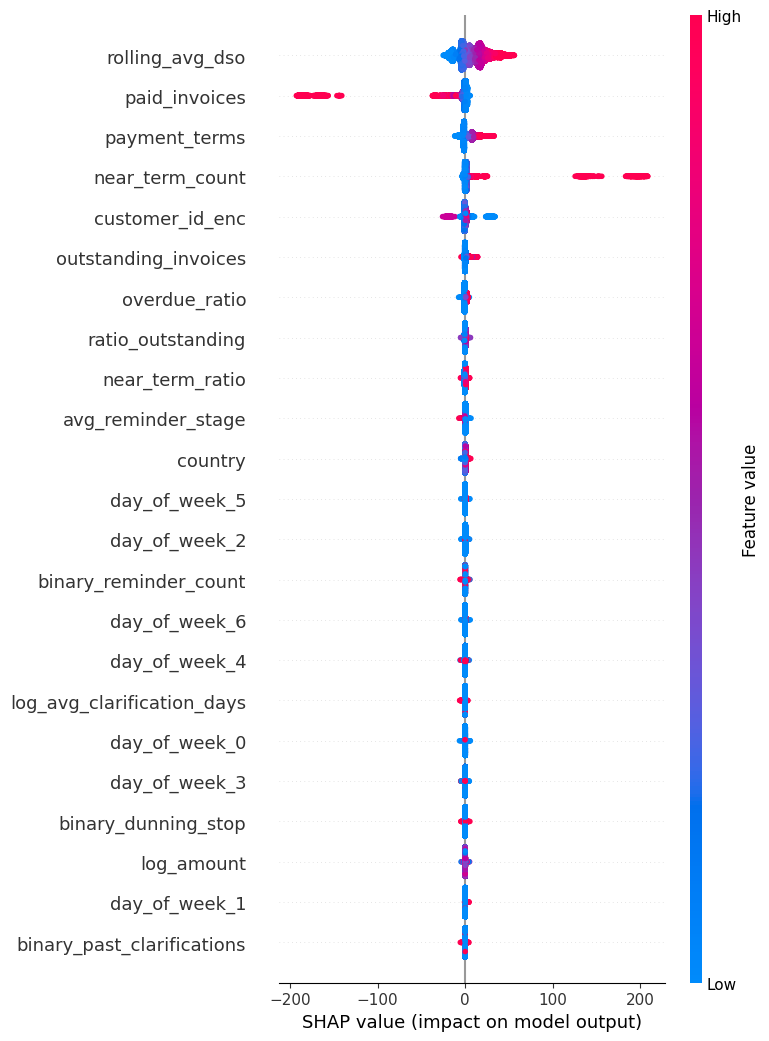

<Figure size 640x480 with 0 Axes>

In [38]:
plt.rcParams.update({'font.size': 16})
#Summary plot
shap.summary_plot(shap_values_reshaped, X_test_subset.values, feature_names=features, max_display=23)

# Save the plot
plt.savefig('shap_summary_plot.png', bbox_inches='tight')